Kernel PCA is also capable of denoising data.

In [1]:
from src.kernel_pca.kpca import KernelPCA
from src.kernel_pca.kernels import RBFKernel
from src.pca import PCA

from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split

import numpy as np

import matplotlib.pyplot as plt

In [2]:
X, y = fetch_openml('mnist_784', version=1, as_frame=False, return_X_y=True)

In [3]:
X = X / 255.
y = y.astype(int)

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=1000, test_size=100, random_state=0, stratify=y)
del X, y
print(X_train.shape, X_test.shape)

(1000, 784) (100, 784)


Generate a noisy dataset and apply Kernel PCA to denoise it.

In [5]:
rng = np.random.default_rng(seed=0)
noise = rng.normal(loc=0, scale=0.3, size=X_train.shape)
X_train_noisy = X_train + noise
noise = rng.normal(loc=0, scale=0.3, size=X_test.shape)
X_test_noisy = X_test + noise
del noise

In [8]:
def plot_each_digit(X: np.ndarray, y: np.ndarray, n: int = 10, title: str = '') -> None:
    fig, axes = plt.subplots(10, n, figsize=(n, 10))
    for digit in range(10):
        digit_indices = np.argwhere(y == digit).ravel()
        for i in range(n):
            axes[digit, i].imshow(X[digit_indices[i]].reshape(28, 28), cmap='gray')
            axes[digit, i].axis('off')
    fig.suptitle(title)
    plt.tight_layout()
    plt.subplots_adjust(hspace=0.1, wspace=0.1)

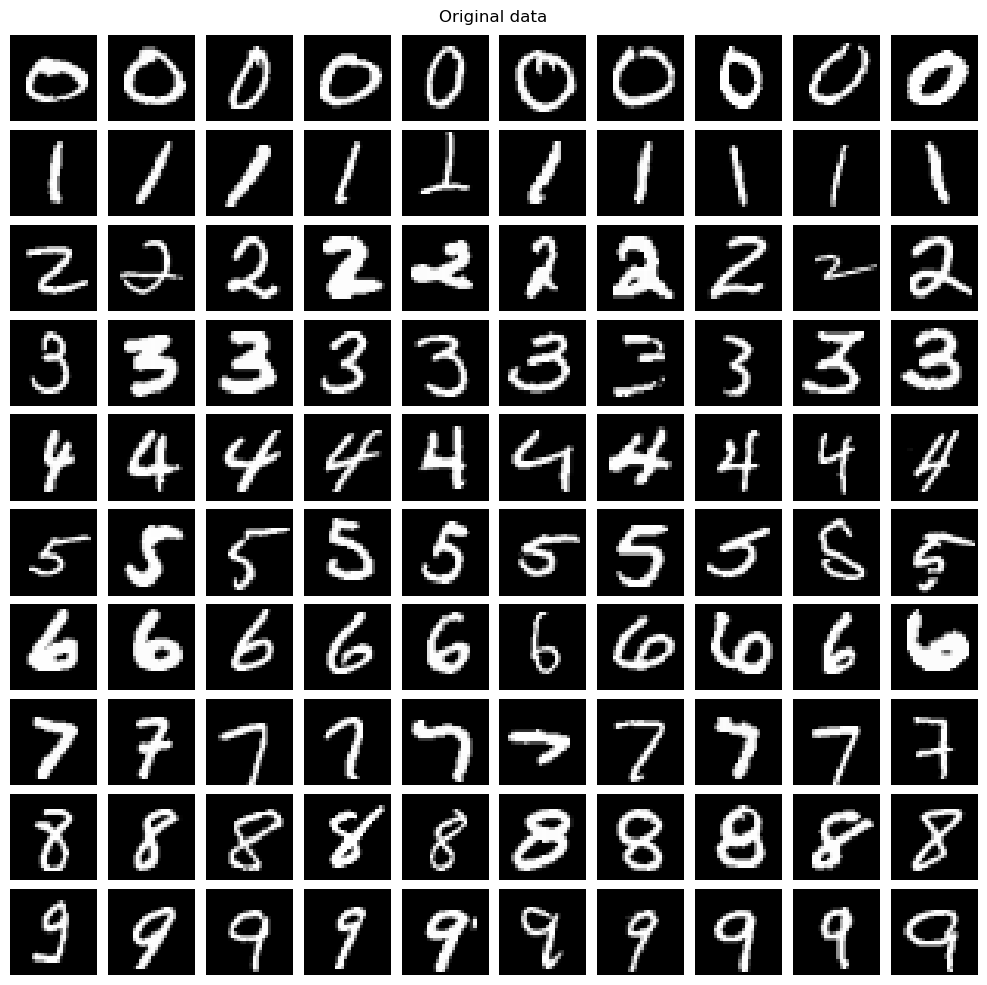

In [9]:
plot_each_digit(X_train, y_train, title='Original data')

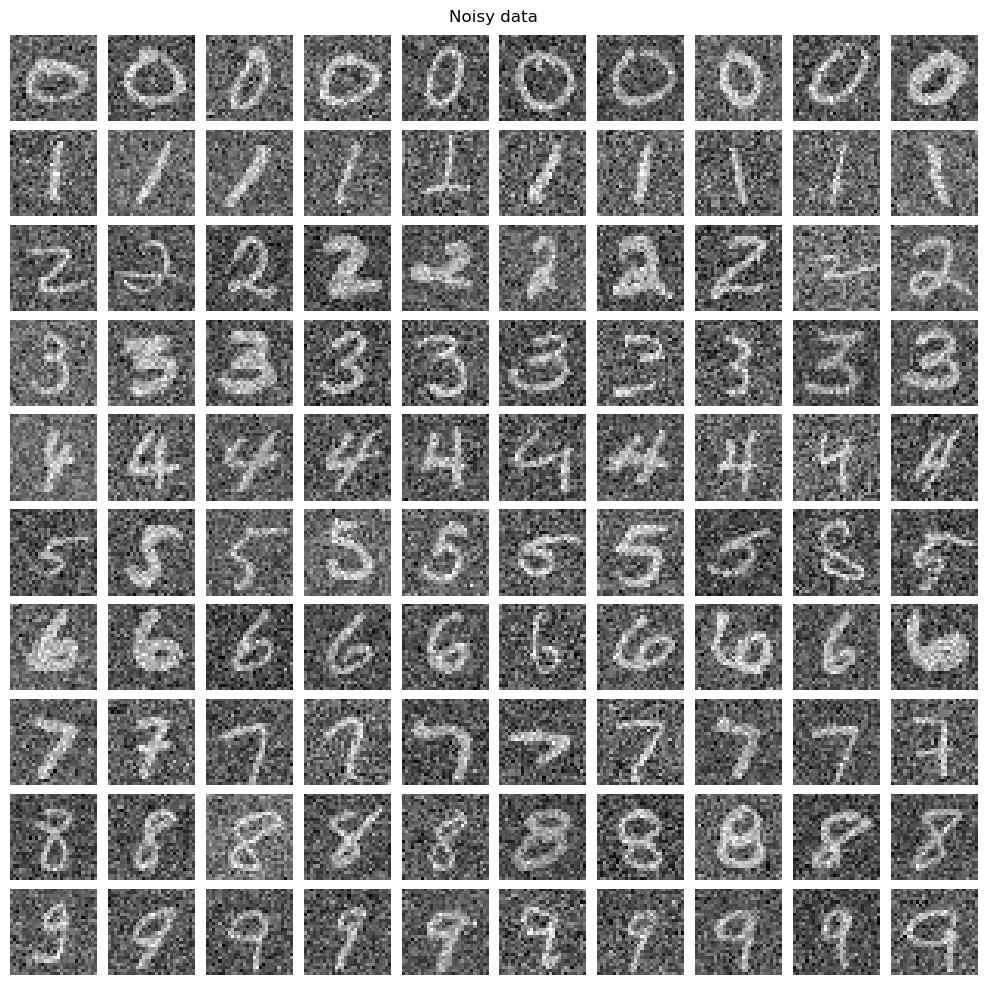

In [10]:
plot_each_digit(X_train_noisy, y_train, title='Noisy data')
plt.savefig('../../resources/kpca/mnist_noisy.png', transparent=True, bbox_inches='tight')

Lets try to denoise the noisy dataset using PCA.

In [11]:
pca = PCA(n_components=32)
pca.fit(X_train_noisy)
X_train_pca = pca.transform(X_train_noisy)
X_train_reconstructed = pca.inverse_transform(X_train_pca)

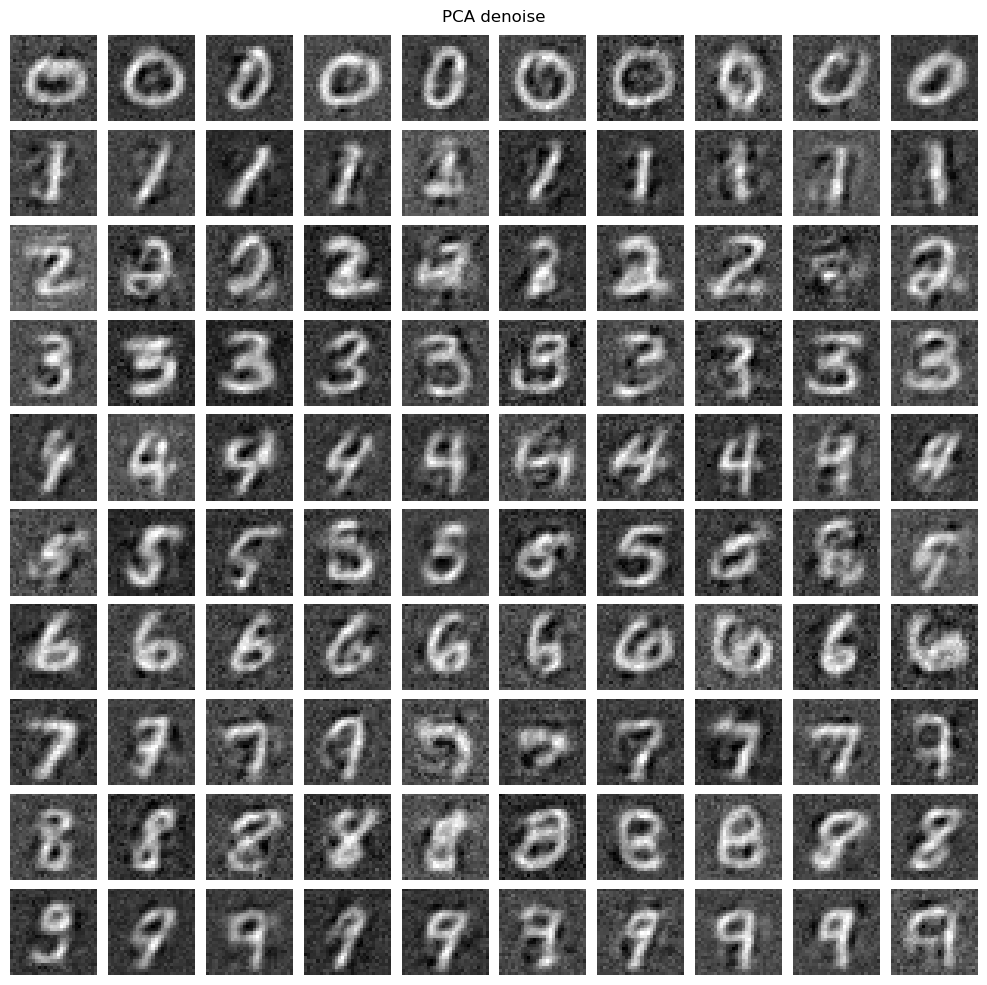

In [12]:
plot_each_digit(X_train_reconstructed, y_train, title='PCA denoise')
del X_train_pca, X_train_reconstructed

There is still some noise in the data.

Lets try to denoise the noisy dataset using Kernel PCA.

In [13]:
kernel_pca = KernelPCA(
    n_components=400,
    kernel=RBFKernel(gamma=3e-3),
    fit_inverse_transform=True,
    alpha=5e-3,
)


In [14]:
X_train_rbf = kernel_pca.fit_transform(X_train_noisy)
X_train_rbf_reconstructed = kernel_pca.inverse_transform(X_train_rbf)

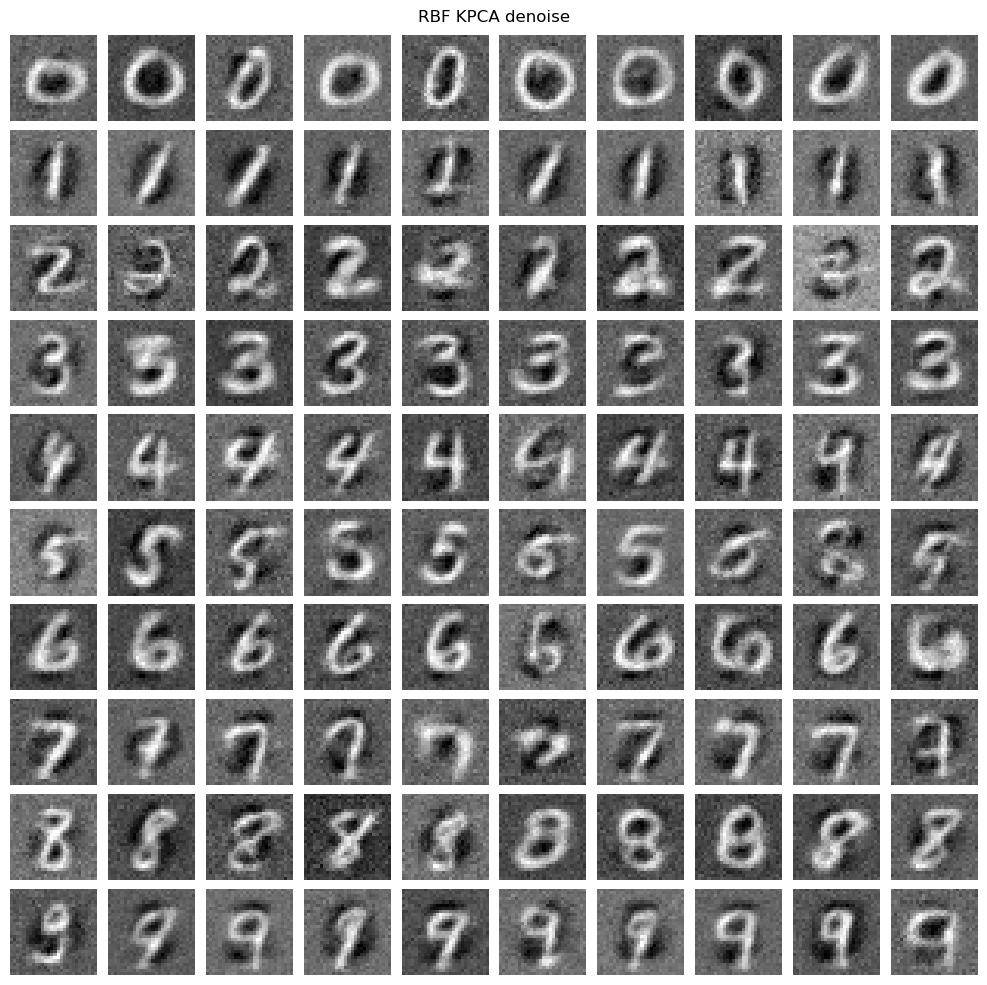

In [15]:
plot_each_digit(X_train_rbf_reconstructed, y_train, title="RBF KPCA denoise")
plt.savefig('../../resources/kpca/mnist_denoise_kpca.png', transparent=True, bbox_inches='tight')

The results are much better than PCA, but there is still some noise in the data.